In [239]:
## Imports ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree, preprocessing
from sklearn.model_selection import KFold, train_test_split, KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pydot

In [241]:
## Step 1 ##
df = pd.read_csv("Titanic.csv")

le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)

enc = preprocessing.OneHotEncoder()
enc.fit(df)
onehotlabels = enc.transform(df).toarray()
print(onehotlabels.shape)

X = pd.concat([df['pclass'],df['sex'],df['age'],df['sibsp']], axis=1)
y = df['survived']
df.describe()

(1309, 4658)


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,654.000000,1.294882,0.381971,652.689076,0.644003,55.081742,0.485103,0.381971,463.625668,122.353705,165.897632,1.495034,21.576776,115.361345,269.812834
std,378.020061,0.837836,0.486055,377.309849,0.478997,27.841324,0.951805,0.838219,278.069490,80.040219,44.787506,0.816130,8.485711,20.621870,115.064299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,327.000000,1.000000,0.000000,326.000000,0.000000,32.000000,0.000000,0.000000,212.000000,49.000000,186.000000,1.000000,17.000000,121.000000,194.000000
50%,654.000000,2.000000,0.000000,652.000000,1.000000,48.000000,0.000000,0.000000,459.000000,111.000000,186.000000,2.000000,27.000000,121.000000,322.000000
75%,981.000000,2.000000,1.000000,979.000000,1.000000,77.000000,1.000000,0.000000,727.000000,181.000000,186.000000,2.000000,27.000000,121.000000,368.000000
max,1308.000000,2.000000,1.000000,1306.000000,1.000000,98.000000,6.000000,7.000000,928.000000,281.000000,186.000000,3.000000,27.000000,121.000000,368.000000


In [242]:
X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   pclass  1309 non-null   int32
 1   sex     1309 non-null   int32
 2   age     1309 non-null   int64
 3   sibsp   1309 non-null   int64
dtypes: int32(2), int64(2)
memory usage: 30.8 KB


      pclass  sex  age  sibsp
1136       2    0   98      0
74         0    1   98      0
372        1    1   44      1
651        2    1   45      0
446        1    0   29      2
...      ...  ...  ...    ...
1160       2    1   72      0
662        2    1   60      0
943        2    0   56      0
578        1    1   45      1
831        2    1   60      1

[1047 rows x 4 columns]
[Text(120.31875000000001, 199.32, 'sex <= 0.5\ngini = 0.473\nsamples = 1047\nvalue = [646, 401]'), Text(41.85, 163.07999999999998, 'pclass <= 1.5\ngini = 0.399\nsamples = 370\nvalue = [102, 268]'), Text(20.925, 126.83999999999999, 'gini = 0.12\nsamples = 202\nvalue = [13, 189]'), Text(62.775000000000006, 126.83999999999999, 'sibsp <= 2.5\ngini = 0.498\nsamples = 168\nvalue = [89, 79]'), Text(41.85, 90.6, 'gini = 0.5\nsamples = 152\nvalue = [75, 77]'), Text(83.7, 90.6, 'gini = 0.219\nsamples = 16\nvalue = [14, 2]'), Text(198.7875, 163.07999999999998, 'age <= 15.5\ngini = 0.316\nsamples = 677\nvalue = [544, 13

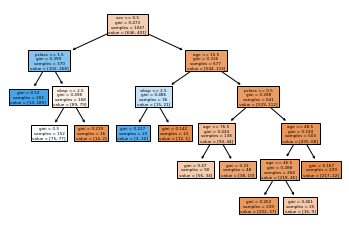

In [243]:
## Step 2 ##
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)
print(X_train)
clf = DecisionTreeClassifier(max_leaf_nodes=10)
clf = clf.fit(X_train, y_train)

print(tree.plot_tree(clf, filled=True, feature_names=X_train.columns))

In [244]:
## Step 3 ##
print("Training Dataset: ")
y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred))

print("\nTest Dataset: ")
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

Training Dataset: 
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       646
           1       0.76      0.71      0.74       401

    accuracy                           0.80      1047
   macro avg       0.79      0.79      0.79      1047
weighted avg       0.80      0.80      0.80      1047


Test Dataset: 
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       163
           1       0.78      0.75      0.76        99

    accuracy                           0.82       262
   macro avg       0.81      0.81      0.81       262
weighted avg       0.82      0.82      0.82       262



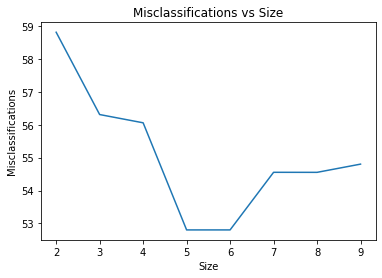

In [245]:
## Step 4 ##
tree_sizes = [size for size in range(2,10)]
tree_para = {'criterion':['gini'],'max_leaf_nodes':tree_sizes}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
clf.fit(X_train, y_train)

scores = clf.cv_results_['mean_test_score']
scores = np.ones(len(tree_sizes))-scores
scores *= len(X_test)

plt.plot(tree_sizes,scores)
plt.title('Misclassifications vs Size')
plt.xlabel('Size')
plt.ylabel('Misclassifications')
plt.show()


[Text(167.4, 190.26, 'sex <= 0.5\ngini = 0.473\nsamples = 1047\nvalue = [646, 401]'), Text(83.7, 135.9, 'pclass <= 1.5\ngini = 0.399\nsamples = 370\nvalue = [102, 268]'), Text(41.85, 81.53999999999999, 'gini = 0.12\nsamples = 202\nvalue = [13, 189]'), Text(125.55000000000001, 81.53999999999999, 'gini = 0.498\nsamples = 168\nvalue = [89, 79]'), Text(251.10000000000002, 135.9, 'age <= 15.5\ngini = 0.316\nsamples = 677\nvalue = [544, 133]'), Text(209.25, 81.53999999999999, 'sibsp <= 2.5\ngini = 0.486\nsamples = 36\nvalue = [15, 21]'), Text(167.4, 27.180000000000007, 'gini = 0.227\nsamples = 23\nvalue = [3, 20]'), Text(251.10000000000002, 27.180000000000007, 'gini = 0.142\nsamples = 13\nvalue = [12, 1]'), Text(292.95, 81.53999999999999, 'gini = 0.288\nsamples = 641\nvalue = [529, 112]')]


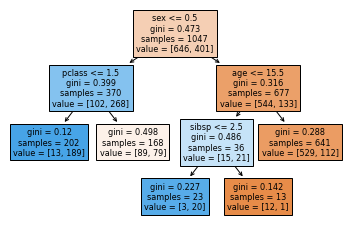

In [246]:
## Step 5 ##
clf_best = DecisionTreeClassifier()
clf_best.set_params(**clf.best_params_)
clf_best.fit(X_train, y_train)
print(tree.plot_tree(clf_best, filled=True, feature_names=X_train.columns))

In [247]:
## Step 6 ##
y_pred = clf_best.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.98      0.85       163
           1       0.92      0.48      0.64        99

    accuracy                           0.79       262
   macro avg       0.84      0.73      0.74       262
weighted avg       0.82      0.79      0.77       262

